In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import confusion_matrix
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
pd.set_option('display.max_columns', 30)

In [2]:
epd = pd.read_csv('IA-04 2018 Election Participation Demographics - Sheet1.csv')
epd.head()

,County,Precinct,Demographic,Type of Vote,Registered 18-24,Registered 25-34,Registered 35-49,Registered 50-64,Registered 65 & Over,Total Registered,Voted 18-24,Voted 25-34,Voted 35-49,Voted 50-64,Voted 65 & Over,Total Voted,Absentee 18-24,Absentee 25-34,Absentee 35-49,Absentee 50-64,Absentee 65 & Over,Total Absentee,Turnout 18-24,Turnout 25-34,Turnout 35-49,Turnout 50-64,Turnout 65 & Over,Total Turnout
0,Audubon,1,Female,Other,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0%,0%,0%,100%,0%,100
1,Audubon,1,Female,Libertarian,2,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0%,0%,0%,0%,0%,0
2,Audubon,1,Male,Libertarian,1,2,1,1,0,5,0,2,1,0,0,3,0,0,0,0,0,0,0%,100%,100%,0%,0%,60
3,Audubon,1,Male,Democrat,18,18,19,60,117,232,6,9,11,47,91,164,3,2,6,21,44,76,33%,50%,58%,78%,78%,71
4,Audubon,1,Female,Democrat,9,35,36,83,132,295,6,21,26,66,96,215,4,11,6,33,50,104,67%,60%,72%,80%,72%,73


In [3]:
epd.dtypes

County                  object
Precinct                object
Demographic             object
Type of Vote            object
Registered 18-24         int64
Registered 25-34         int64
Registered 35-49         int64
Registered 50-64         int64
Registered 65 & Over     int64
Total Registered         int64
Voted 18-24              int64
Voted 25-34              int64
Voted 35-49              int64
Voted 50-64              int64
Voted 65 & Over          int64
Total Voted              int64
Absentee 18-24           int64
Absentee 25-34           int64
Absentee 35-49           int64
Absentee 50-64           int64
Absentee 65 & Over       int64
Total Absentee           int64
Turnout 18-24           object
Turnout 25-34           object
Turnout 35-49           object
Turnout 50-64           object
Turnout 65 & Over       object
Total Turnout            int64
dtype: object

In [4]:
epd.isna().sum()

County                  0
Precinct                0
Demographic             0
Type of Vote            0
Registered 18-24        0
Registered 25-34        0
Registered 35-49        0
Registered 50-64        0
Registered 65 & Over    0
Total Registered        0
Voted 18-24             0
Voted 25-34             0
Voted 35-49             0
Voted 50-64             0
Voted 65 & Over         0
Total Voted             0
Absentee 18-24          0
Absentee 25-34          0
Absentee 35-49          0
Absentee 50-64          0
Absentee 65 & Over      0
Total Absentee          0
Turnout 18-24           0
Turnout 25-34           0
Turnout 35-49           0
Turnout 50-64           0
Turnout 65 & Over       0
Total Turnout           0
dtype: int64

In [5]:
epd.shape

(4090, 28)

In [6]:
epd['Turnout 18-24']=epd['Turnout 18-24'].str[:-1].astype(int)
epd['Turnout 25-34']=epd['Turnout 25-34'].str[:-1].astype(int)
epd['Turnout 35-49']=epd['Turnout 35-49'].str[:-1].astype(int)
epd['Turnout 50-64']=epd['Turnout 50-64'].str[:-1].astype(int)
epd['Turnout 65 & Over']=epd['Turnout 65 & Over'].str[:-1].astype(int)
epd.dtypes

County                  object
Precinct                object
Demographic             object
Type of Vote            object
Registered 18-24         int64
Registered 25-34         int64
Registered 35-49         int64
Registered 50-64         int64
Registered 65 & Over     int64
Total Registered         int64
Voted 18-24              int64
Voted 25-34              int64
Voted 35-49              int64
Voted 50-64              int64
Voted 65 & Over          int64
Total Voted              int64
Absentee 18-24           int64
Absentee 25-34           int64
Absentee 35-49           int64
Absentee 50-64           int64
Absentee 65 & Over       int64
Total Absentee           int64
Turnout 18-24            int64
Turnout 25-34            int64
Turnout 35-49            int64
Turnout 50-64            int64
Turnout 65 & Over        int64
Total Turnout            int64
dtype: object

In [7]:
demofreq = epd.groupby("Demographic")["Total Voted"].sum()
demoreg = epd.groupby("Demographic")["Total Registered"].sum()
demoturn = demofreq/demoreg
print(demoturn)

Demographic
Female    0.604684
Male      0.597919
dtype: float64


Text(0, 0.5, 'Total Voted in 2018')

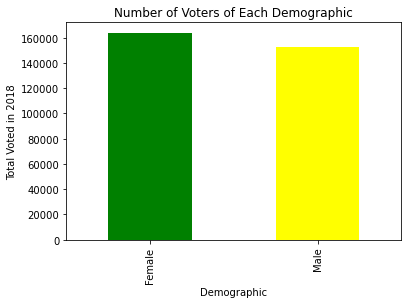

In [8]:
demographicbar = epd.groupby(['Demographic'])['Total Voted'].sum().plot(kind='bar', color=['green','yellow'], title='Number of Voters of Each Demographic')
plt.ylabel("Total Voted in 2018")

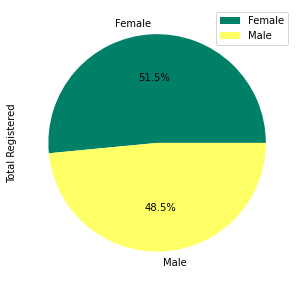

In [9]:
demopie = epd.groupby(['Demographic'])['Total Registered'].sum().plot(kind='pie', autopct = '%1.1f%%', colormap ='summer', figsize=(5,5))
plt.legend()
plt.show()

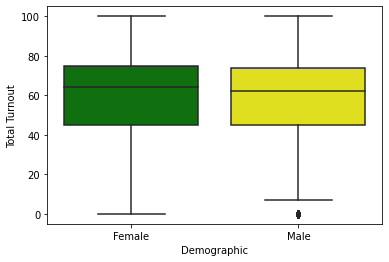

In [10]:
grye=['green','yellow']
sns.set_palette(sns.color_palette(grye))
sns.boxplot(x='Demographic',y='Total Turnout', data=epd)

In [11]:
epdfem = epd[epd["Demographic"] == 'Female']
epdmale = epd[epd["Demographic"] == 'Male']
display(ttest_ind(epdfem['Total Turnout'], epdmale['Total Turnout']))

Ttest_indResult(statistic=0.5263414832628394, pvalue=0.5986795191634626)

In [12]:
tovfreq = epd.groupby("Type of Vote")["Total Voted"].sum()
tovreg = epd.groupby("Type of Vote")["Total Registered"].sum()
tovturn = tovfreq/tovreg
print(tovturn)

Type of Vote
Democrat       0.660725
Libertarian    0.552326
No Party       0.440527
Other          0.394895
Republican     0.718190
dtype: float64


Text(0, 0.5, 'Total Voted in 2018')

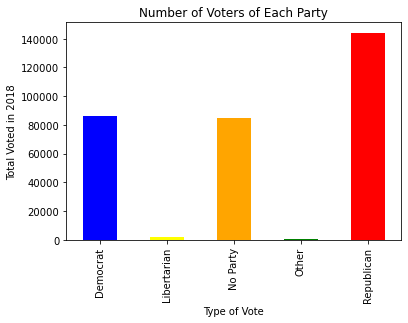

In [13]:
tovplot = epd.groupby(['Type of Vote'])['Total Voted'].sum().plot(kind='bar', color=['blue','yellow','orange','green','red'], title='Number of Voters of Each Party')
plt.ylabel("Total Voted in 2018")

Text(0, 0.5, 'Percent Who Voted in 2018')

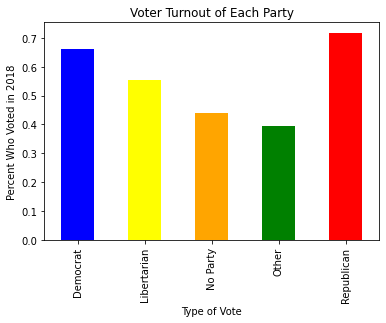

In [14]:
tovplot = tovturn.plot(kind='bar', color=['blue','yellow','orange','green','red'], title='Voter Turnout of Each Party')
plt.ylabel("Percent Who Voted in 2018")

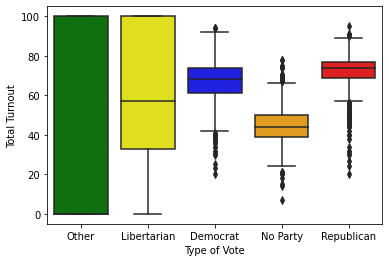

In [15]:
Colors=['green','yellow','blue','orange','red']
sns.set_palette(sns.color_palette(Colors))
sns.boxplot(x='Type of Vote',y='Total Turnout', data=epd)

In [16]:
MultiComp = MultiComparison(epd['Total Turnout'], epd['Type of Vote'])
print(MultiComp.tukeyhsd().summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
   Democrat Libertarian  -10.046  0.001 -12.9257  -7.1663   True
   Democrat    No Party -22.0988  0.001 -24.7964 -19.4013   True
   Democrat       Other -27.1022  0.001 -30.6778 -23.5266   True
   Democrat  Republican   5.3633  0.001   2.6678   8.0587   True
Libertarian    No Party -12.0529  0.001 -14.9345  -9.1712   True
Libertarian       Other -17.0562  0.001 -20.7727 -13.3398   True
Libertarian  Republican  15.4092  0.001  12.5295  18.2889   True
   No Party       Other  -5.0034 0.0013  -8.5805  -1.4262   True
   No Party  Republican  27.4621  0.001  24.7646  30.1596   True
      Other  Republican  32.4655  0.001  28.8899  36.0411   True
----------------------------------------------------------------


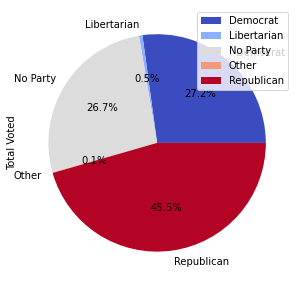

In [17]:
countypie = epd.groupby(['Type of Vote'])['Total Voted'].sum().plot(kind='pie', autopct = '%1.1f%%', colormap ='coolwarm', figsize=(5,5))
plt.legend()
plt.show()

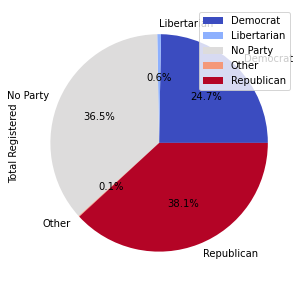

In [18]:
countypie = epd.groupby(['Type of Vote'])['Total Registered'].sum().plot(kind='pie', autopct = '%1.1f%%', colormap ='coolwarm', figsize=(5,5))
plt.legend()
plt.show()

In [19]:
countyvote = epd.groupby("County")["Total Voted"].sum()
countyreg = epd.groupby("County")["Total Registered"].sum()
countyturnout = countyvote/countyreg
print(countyturnout)

County
Audubon         0.629827
Boone           0.621061
Buena Vista     0.528477
Butler          0.606697
Calhoun         0.644993
Carroll         0.627732
Cerro Gordo     0.608480
Cherokee        0.619338
Chickasaw       0.610830
Clay            0.587417
Crawford        0.545050
Dickinson       0.642644
Emmet           0.555279
Floyd           0.569532
Franklin        0.615660
Greene          0.621230
Grundy          0.638606
Hamilton        0.622483
Hancock         0.612972
Hardin          0.618625
Harrison        0.677180
Humboldt        0.618598
Ida             0.601920
Kossuth         0.644408
Lyon            0.615737
Monona          0.612810
Osceola         0.580881
OʻBrien         0.597187
Palo Alto       0.598084
Plymouth        0.604544
Pocahontas      0.620613
Sac             0.596605
Shelby          0.608344
Sioux           0.671063
Story           0.597200
Webster         0.550190
Winnebago       0.582368
Woodbury        0.565614
Wright          0.596371
dtype: float64


Text(0, 0.5, 'Voter Turnout in 2018')

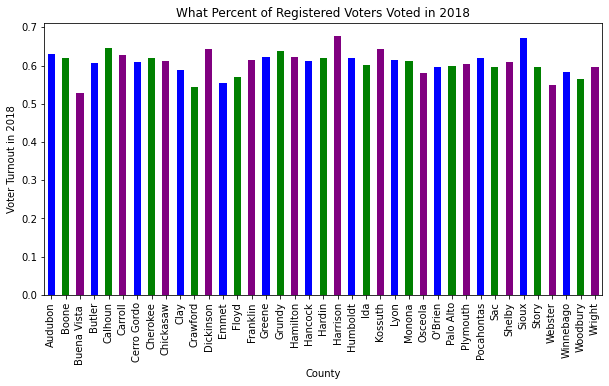

In [20]:
countybar = countyturnout.plot(kind='bar', color=['blue','green','purple'], title='What Percent of Registered Voters Voted in 2018', figsize=(10,5))
plt.ylabel("Voter Turnout in 2018")

Text(0, 0.5, 'Total Voted in 2018')

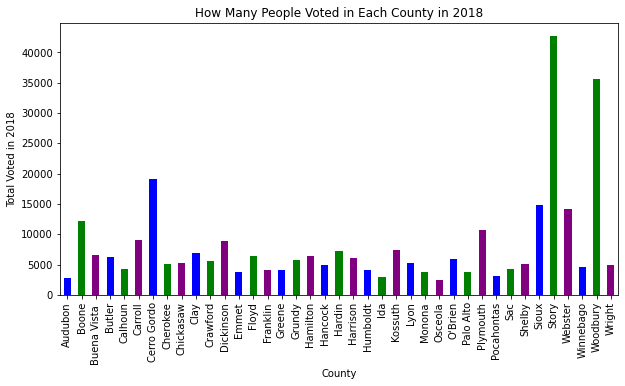

In [21]:
countybar = epd.groupby(['County'])['Total Voted'].sum().plot(kind='bar', color=['blue','green','purple'], title='How Many People Voted in Each County in 2018', figsize=(10,5))
plt.ylabel("Total Voted in 2018")

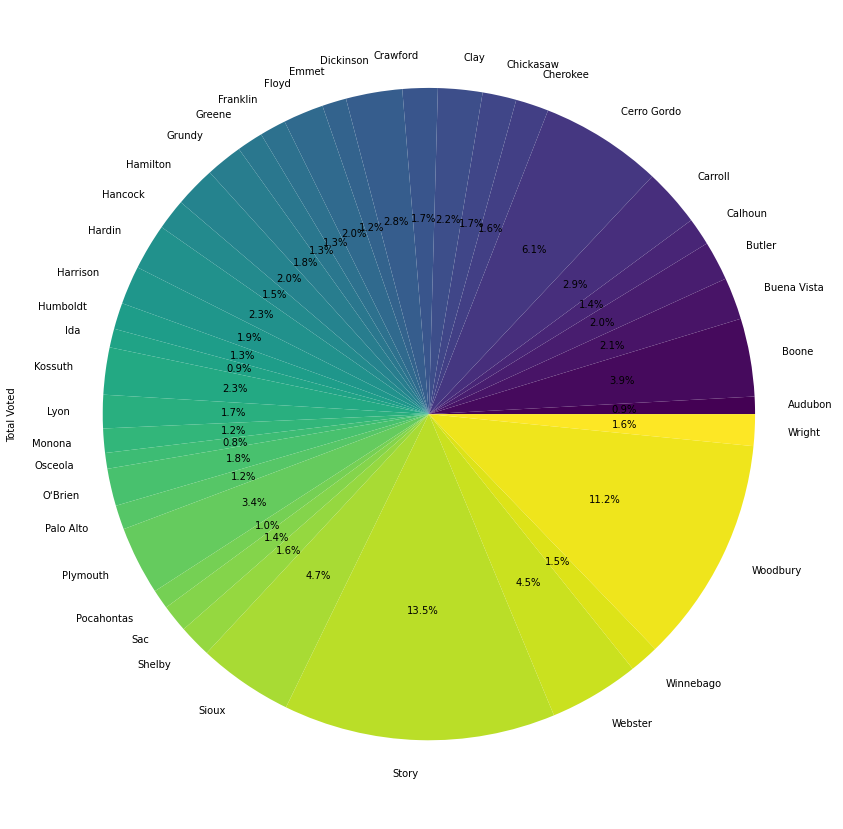

In [22]:
countypie = epd.groupby(['County'])['Total Voted'].sum().plot(kind='pie', autopct = '%1.1f%%', colormap ='viridis', figsize=(15,15))
plt.show()

In [35]:
MultiComp = MultiComparison(epd['Total Turnout'], epd['County'])
print(MultiComp.tukeyhsd().summary())

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     Audubon        Boone   0.0119    0.9 -24.0173  24.041  False
     Audubon Buena Vista  -13.7091    0.9 -38.4137 10.9955  False
     Audubon       Butler  -7.7585    0.9 -33.0582 17.5413  False
     Audubon      Calhoun   2.4123    0.9  -22.442 27.2667  False
     Audubon      Carroll   0.5838    0.9 -23.7208 24.8885  False
     Audubon  Cerro Gordo  -3.1578    0.9 -26.6258 20.3103  False
     Audubon     Cherokee  -3.3971    0.9 -29.0378 22.2436  False
     Audubon    Chickasaw  -3.0522    0.9 -27.5652 21.4609  False
     Audubon         Clay  -4.8477    0.9 -29.3803  19.685  False
     Audubon     Crawford  -8.5859    0.9 -34.0043 16.8326  False
     Audubon    Dickinson   -3.517    0.9 -27.6658 20.6318  False
     Audubon        Emmet  -1.8765    0.9 -26.7855 23.0324  False
     Audub

In [24]:
vote1 = epd['Voted 18-24'].sum()
vote2 = epd['Voted 25-34'].sum()
vote3 = epd['Voted 35-49'].sum()
vote4 = epd['Voted 50-64'].sum()
vote5 = epd['Voted 65 & Over'].sum()
reg1 = epd['Registered 18-24'].sum()
reg2 = epd['Registered 25-34'].sum()
reg3 = epd['Registered 35-49'].sum()
reg4 = epd['Registered 50-64'].sum()
reg5 = epd['Registered 65 & Over'].sum()
d = {'Group':["18-24","25-34","35-49","50-64", "65 & Over"],'Voted': [vote1, vote2, vote3, vote4, vote5], 'Registered':[reg1, reg2, reg3, reg4, reg5], 'Turnout':[vote1/reg1, vote2/reg2, vote3/reg3, vote4/reg4, vote5/reg5]}
age = pd.DataFrame(data=d)
age.head()

,Group,Voted,Registered,Turnout
0,18-24,23790,66020,0.360345
1,25-34,32977,86180,0.382653
2,35-49,67732,108438,0.624615
3,50-64,94596,131813,0.717653
4,65 & Over,104746,134258,0.780184


Text(0, 0.5, 'Percent Who Voted in 2018')

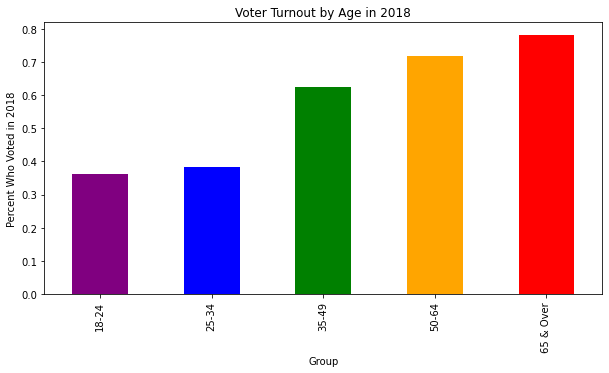

In [25]:
countybar = age.groupby(['Group'])['Turnout'].sum().plot(kind='bar', color = ['purple', 'blue','green','orange','red'], title='Voter Turnout by Age in 2018', figsize=(10,5))
plt.ylabel("Percent Who Voted in 2018")

Text(0, 0.5, 'Total Registered in 2018')

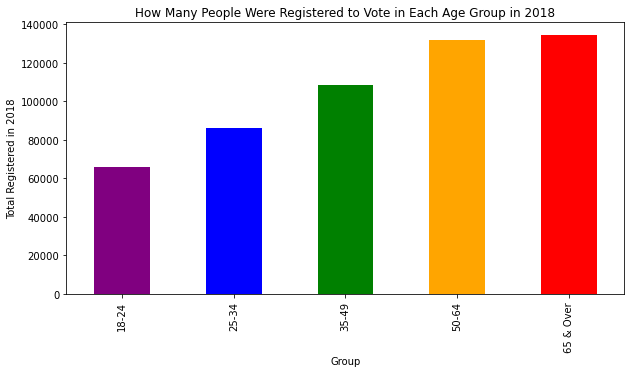

In [26]:
countybar = age.groupby(['Group'])['Registered'].sum().plot(kind='bar', color = ['purple', 'blue','green','orange','red'], title='How Many People Were Registered to Vote in Each Age Group in 2018', figsize=(10,5))
plt.ylabel("Total Registered in 2018")

Text(0, 0.5, 'Total Voted in 2018')

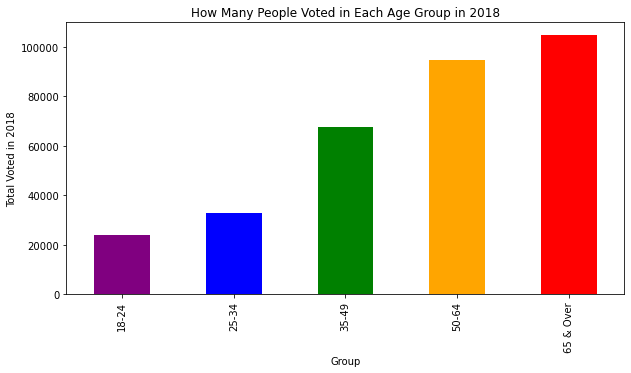

In [27]:
countybar = age.groupby(['Group'])['Voted'].sum().plot(kind='bar', color = ['purple', 'blue','green','orange','red'], title='How Many People Voted in Each Age Group in 2018', figsize=(10,5))
plt.ylabel("Total Voted in 2018")

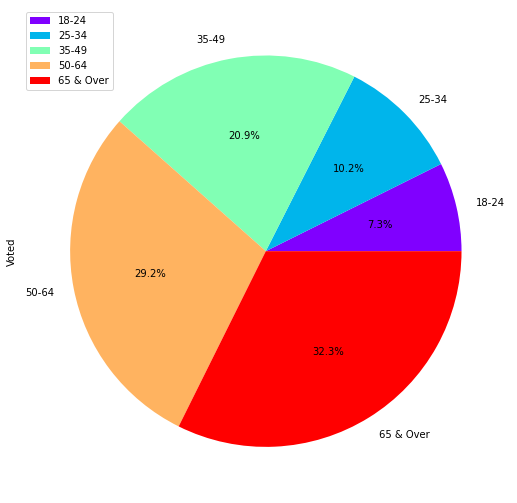

In [28]:
countypie = age.groupby(['Group'])['Voted'].sum().plot(kind='pie', autopct = '%1.1f%%', colormap='rainbow', figsize=(9,9))
plt.legend()
plt.show()

In [29]:
epd.corr(method='pearson')

,Registered 18-24,Registered 25-34,Registered 35-49,Registered 50-64,Registered 65 & Over,Total Registered,Voted 18-24,Voted 25-34,Voted 35-49,Voted 50-64,Voted 65 & Over,Total Voted,Absentee 18-24,Absentee 25-34,Absentee 35-49,Absentee 50-64,Absentee 65 & Over,Total Absentee,Turnout 18-24,Turnout 25-34,Turnout 35-49,Turnout 50-64,Turnout 65 & Over,Total Turnout
Registered 18-24,1.000000,0.693277,0.400717,0.292938,0.212593,0.627238,0.927804,0.445029,0.063680,0.260143,0.200273,0.439432,0.754930,0.397717,0.315892,0.251222,0.188634,0.331751,0.012561,-0.036655,0.024969,0.056442,0.125601,-0.103656
Registered 25-34,0.693277,1.000000,0.847223,0.710224,0.545262,0.897156,0.652054,0.865680,0.132138,0.620968,0.506142,0.744257,0.629830,0.733403,0.656486,0.576024,0.477889,0.633935,0.020847,0.054998,0.151622,0.212099,0.317027,-0.072466
Registered 35-49,0.400717,0.847223,1.000000,0.896159,0.726539,0.917666,0.355772,0.842646,0.161022,0.818228,0.689357,0.854191,0.415929,0.679395,0.794371,0.741109,0.643491,0.753244,0.028508,0.133233,0.244659,0.301795,0.397599,0.022999
Registered 50-64,0.292938,0.710224,0.896159,1.000000,0.883323,0.907883,0.275887,0.783349,0.150261,0.969413,0.865176,0.934840,0.378299,0.647631,0.793049,0.886186,0.802578,0.864432,0.044056,0.213648,0.344496,0.419710,0.496855,0.158278
Registered 65 & Over,0.212593,0.545262,0.726539,0.883323,1.000000,0.820370,0.229662,0.674668,0.129178,0.904747,0.988342,0.915158,0.345608,0.591992,0.728548,0.853664,0.945944,0.904665,0.045662,0.249243,0.365107,0.434043,0.482328,0.239665
Total Registered,0.627238,0.897156,0.917666,0.907883,0.820370,1.000000,0.590157,0.856387,0.151563,0.862832,0.793479,0.938075,0.609433,0.725298,0.787215,0.799940,0.747497,0.844745,0.037330,0.152101,0.276771,0.347375,0.440264,0.068418
Voted 18-24,0.927804,0.652054,0.355772,0.275887,0.229662,0.590157,1.000000,0.487899,0.054684,0.277560,0.233575,0.476782,0.881594,0.477953,0.363080,0.289826,0.229023,0.391081,0.031474,0.004059,0.066003,0.087082,0.134208,-0.027095
Voted 25-34,0.445029,0.865680,0.842646,0.783349,0.674668,0.856387,0.487899,1.000000,0.148525,0.761689,0.664311,0.854931,0.566412,0.867459,0.769121,0.702398,0.619652,0.761275,0.034874,0.241582,0.265947,0.309311,0.373100,0.094856
Voted 35-49,0.063680,0.132138,0.161022,0.150261,0.129178,0.151563,0.054684,0.148525,1.000000,0.145262,0.124795,0.151217,0.065827,0.107664,0.135627,0.124901,0.115064,0.129247,0.004759,0.032407,0.058176,0.058350,0.067775,0.013589
Voted 50-64,0.260143,0.620968,0.818228,0.969413,0.904747,0.862832,0.277560,0.761689,0.145262,1.000000,0.911189,0.956606,0.392552,0.648825,0.803309,0.918707,0.845353,0.897507,0.051531,0.257325,0.388264,0.468291,0.504592,0.242604


In [30]:
x2 = epd["Total Registered"]
y2 = epd["Total Turnout"]
X2 = sm.add_constant(x2)
lr2 = (sm.OLS(y2,X2))
lr2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Total Turnout   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     19.23
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           1.19e-05
Time:                        22:33:30   Log-Likelihood:                -18937.
No. Observations:                4090   AIC:                         3.788e+04
Df Residuals:                    4088   BIC:                         3.789e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               56.7545      0.534    106.187      0.000      55.707      57.802
Total Registered     0.0125      0.003      4.385      0.000       0.007       0.018
==============================================================================
Omnibus:                      211.366   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.938
Skew:                          -0.585   Prob(JB):                     1.07e-53
Kurtosis:                       3.248   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

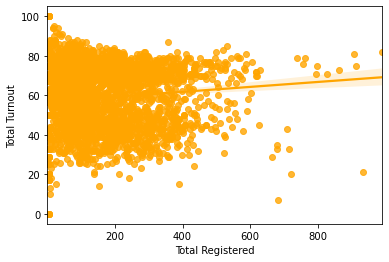

In [31]:
sns.regplot(x="Total Registered", y="Total Turnout", color='orange',data=epd);

In [32]:
x1 = epd["Total Registered"]
y1 = epd["Total Voted"]
X1 = sm.add_constant(x1)
lr = (sm.OLS(y1,X1))
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Voted   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                 2.997e+04
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:33:31   Log-Likelihood:                -19729.
No. Observations:                4090   AIC:                         3.946e+04
Df Residuals:                    4088   BIC:                         3.947e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2172      0.649      0.335      0.738      -1.054       1.489
Total Registered     0.5997      0.003    173.131      0.000       0.593       0.607
==============================================================================
Omnibus:                     1769.712   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49470.400
Skew:                          -1.469   Prob(JB):                         0.00
Kurtosis:                      19.783   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

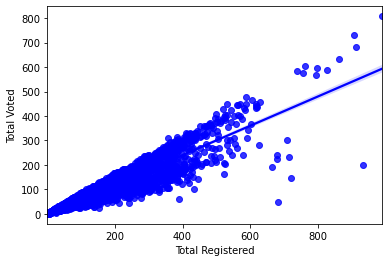

In [33]:
sns.regplot(x="Total Registered", y="Total Voted", color='blue', data=epd);